In [311]:
%pylab inline
root_dir = '/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_Pairs_Ross/'
root_dir_m = '/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_Pairs_Mariana/'

Populating the interactive namespace from numpy and matplotlib


In [25]:
def compute_xi_Ross(mock_no):
    ratio_gal_rand = float(np.genfromtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,max_rows=1))
    pairs_data = np.loadtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,skiprows=1)
    r_all = pairs_data[:,0]
    mu_all = pairs_data[:,1]
    r_bins = np.unique(r_all)
    mu_bins = np.unique(mu_all)
    DD_data = pairs_data[:,2].reshape(len(r_bins),len(mu_bins))
    DR_data = pairs_data[:,3].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand/2. # from different normalization
    RR_data = pairs_data[:,4].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand**2.
    xi_est = (DD_data-2.*DR_data+RR_data)/RR_data
    
    return r_bins,mu_bins,xi_est

In [291]:
# Mock independent quantities:
mfile_RR = root_dir_m+'qpm-unrecon-0001-RR.dat'
all_RR_data_M = np.loadtxt(mfile_RR,skiprows=2)
r_bins_tmp = np.genfromtxt(mfile_RR,max_rows=1)
r_bins_m = (r_bins_tmp[:-1]+r_bins_tmp[1:])/2.
mu_bins_tmp = np.genfromtxt(mfile_RR,max_rows=1,skip_header=1)
mu_bins_m = (mu_bins_tmp[:-1]+mu_bins_tmp[1:])/2.

In [310]:
mu_bins_m=[(0.5+i)/120. for i in range(120)]

In [295]:
def compute_xi_Mariana(mock_no):
    mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4)
    norms_M = np.loadtxt(mfile_norms,usecols=1)
    factor = norms_M[0]/norms_M[1]

    mfile_DD = root_dir_m+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4)
    mfile_DR = root_dir_m+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4)
    DD_data_M = np.loadtxt(mfile_DD,skiprows=2)
    DR_data_M = np.loadtxt(mfile_DR,skiprows=2)*factor
    RR_data_M = all_RR_data_M*factor**2.

    xi_est_M = (DD_data_M-2.*DR_data_M+RR_data_M)/RR_data_M
    
    return r_bins_m,mu_bins_m,xi_est_M

Compute mean xi:

In [297]:
xi_R=[];xi_M=[]
for i in range(1,100):
    r_bins,mu_bins,xi_tmp=compute_xi_Ross(i)
    r_bins_m,mu_bins_m,xi_tmp_M = compute_xi_Mariana(i)
    xi_R.append(xi_tmp)
    xi_M.append(xi_tmp_M)
xi_R_mean = np.mean(np.asarray(xi_R),axis=0)
xi_M_mean = np.mean(np.asarray(xi_M),axis=0)

In [6]:
r_bins,mu_bins,xi_est=compute_xi_Ross(57)
r_bins_m,mu_bins_m,xi_est_M=compute_xi_Mariana(57)

In [298]:
plt.plot(r_bins,xi_est.mean(axis=1)*r_bins*r_bins,label='Ross')
plt.plot(r_bins_m,xi_est_M.mean(axis=1)*r_bins_m*r_bins_m,label='Mariana')
plt.ylabel(r'$r^2\xi(r)$',fontsize=16);
plt.xlabel(r'$r$',fontsize=16);plt.title(r'$\xi(r)$ estimates from LS estimator of Pair Counts for Mock 57',fontsize=16);
plt.legend();

NameError: name 'xi_est' is not defined

Find actual mean:

In [8]:
xi_mock_mean=np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",skip_header=2)
mean_r = np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",max_rows=1)
mean_mu = np.genfromtxt('../../xi_functions/QPM_Mean_xi.txt',skip_header=1,max_rows=1)

In [9]:
QPM_mash_xi = np.genfromtxt('../../xi_functions/QPM_Mash.xi',skip_header=2)
QPM_mash_r = np.genfromtxt('../../xi_functions/QPM_Mash.xi',max_rows=1)

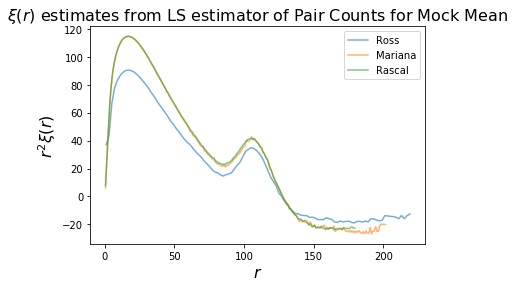

In [10]:
plt.plot(r_bins,xi_R_mean.mean(axis=1)*r_bins*r_bins,label='Ross',alpha=0.6)
plt.plot(r_bins_m,xi_M_mean.mean(axis=1)*r_bins_m*r_bins_m,label='Mariana',alpha=0.6)
plt.plot(mean_r,xi_mock_mean.mean(axis=1)*mean_r**2.,label='Rascal',alpha=0.6)
plt.ylabel(r'$r^2\xi(r)$',fontsize=16);
plt.xlabel(r'$r$',fontsize=16);plt.title(r'$\xi(r)$ estimates from LS estimator of Pair Counts for Mock Mean',fontsize=16);
plt.legend();

Now save the computed correlation functions from the Mariana pair counts to file:

In [299]:
for mock_no in range(1,100):
    outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    with open(outdir+'QPM_Mariana_mock_%d.xi'%mock_no,"w") as outfile:
        for i in range(len(r_bins_m)):
            outfile.write("%.8e "%r_bins_m[i])
        outfile.write("\n")
        for j in range(len(mu_bins_m)):
            outfile.write("%.8e "%mu_bins_m[j])
        outfile.write("\n")
        for i in range(len(r_bins_m)):
            for j in range(len(mu_bins_m)):
                outfile.write("%.8e "%xi_M[mock_no-1][i][j])
            outfile.write("\n")

Also save mean of these mocks:

In [300]:
outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
with open(outdir+'QPM_Mariana_mean.xi',"w") as outfile:
    for i in range(len(r_bins_m)):
        outfile.write("%.8e "%r_bins_m[i])
    outfile.write("\n")
    for j in range(len(mu_bins_m)):
        outfile.write("%.8e "%mu_bins_m[j])
    outfile.write("\n")
    for i in range(len(r_bins_m)):
        for j in range(len(mu_bins_m)):
            outfile.write("%.8e "%xi_M_mean[i][j])
        outfile.write("\n")

In [281]:
RR=np.loadtxt('/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_Pairs_Mariana/qpm-unrecon-0001-RR.dat',skiprows=2)

xi_fine=np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",skip_header=2)
r_bins_m = np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",max_rows=1)
mu_bins_m = np.genfromtxt('../../xi_functions/QPM_Mean_xi.txt',skip_header=1,max_rows=1)

r_new=int(len(r_bins_m)//5);mu_new=int(len(mu_bins_m)//12)
xi_coarse=np.zeros([r_new,mu_new])
norm_coarse = np.zeros([r_new,mu_new])
r_coarse=np.zeros(r_new);mu_coarse=np.zeros(mu_new)
for j in range(len(mu_bins_m)//12*12):
    mu_coarse[j//12]+=mu_bins_m[j]/12.
for i in range(len(r_bins_m)//5*5):
    r_coarse[i//5]+=0.2*r_bins_m[i]
    for j in range(len(mu_bins_m)//12*12):
        xi_coarse[i//5,j//12]+=xi_fine[i,j]*RR[i,j]#*np.sqrt(1.-mu_bins_m[j]**2.)
        norm_coarse[i//5,j//12]+=RR[i,j]#np.sqrt(1.-mu_bins_m[j]**2.)
xi_coarse/=norm_coarse

outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
with open(outdir+'QPM_CoarseNew_mean.xi',"w") as outfile:
    for i in range(len(r_coarse)):
        outfile.write("%.8e "%r_coarse[i])
    outfile.write("\n")
    for j in range(len(mu_coarse)):
        outfile.write("%.8e "%mu_coarse[j])
    outfile.write("\n")
    for i in range(len(r_coarse)):
        for j in range(len(mu_coarse)):
            outfile.write("%.8e "%xi_coarse[i][j])
        outfile.write("\n")

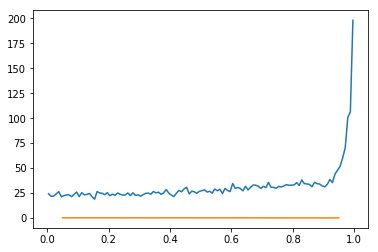

In [244]:
plt.plot(mu_bins_m,xi_fine[0,:])
plt.plot(mu_coarse,xi_coarse[6,:])

In [227]:
def compute_all_xi(mock_no):
    mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4)
    norms_M = np.loadtxt(mfile_norms,usecols=1)
    factor = norms_M[0]/norms_M[1]

    mfile_DD = root_dir_m+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4)
    mfile_DR = root_dir_m+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4)
    DD_data_M = np.loadtxt(mfile_DD,skiprows=2)
    DR_data_M = np.loadtxt(mfile_DR,skiprows=2)*factor
    RR_data_M = all_RR_data_M*factor**2.

    xi_est_M = (DD_data_M-2.*DR_data_M+RR_data_M)/RR_data_M
    
    return r_bins_m,mu_bins_m,DD_data_M,DR_data_M,RR_data_M,xi_est_M

In [282]:
for ii in range(1,100):
    r_bins_m,mu_bins_m,DD,DR,RR,xi_fine = compute_all_xi(ii)
    r_new=int(len(r_bins_m)//5);mu_new=int(len(mu_bins_m)//12)
    xi_coarse=np.zeros([r_new,mu_new])
    norm_coarse = np.zeros([r_new,mu_new])
    r_coarse=np.zeros(r_new);mu_coarse=np.zeros(mu_new)
    for j in range(len(mu_bins_m)//12*12):
        mu_coarse[j//12]+=mu_bins_m[j]/12.
    for i in range(len(r_bins_m)//5*5):
        r_coarse[i//5]+=0.2*r_bins_m[i]
        for j in range(len(mu_bins_m)//12*12):
            xi_coarse[i//5,j//12]+=(DD[i,j]-2.*DR[i,j]+RR[i,j])#*np.sqrt(1.-mu_bins_m[j]**2.)
            norm_coarse[i//5,j//12]+=RR[i,j]#np.sqrt(1.-mu_bins_m[j]**2.)
    xi_coarse/=norm_coarse
    
    outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
    with open(outdir+'QPM_CoarseNew_mock_%d.xi'%ii,"w") as outfile:
        for i in range(len(r_coarse)):
            outfile.write("%.8e "%r_coarse[i])
        outfile.write("\n")
        for j in range(len(mu_coarse)):
            outfile.write("%.8e "%mu_coarse[j])
        outfile.write("\n")
        for i in range(len(r_coarse)):
            for j in range(len(mu_coarse)):
                outfile.write("%.8e "%xi_coarse[i][j])
            outfile.write("\n")

In [275]:
np.loadtxt('/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/QPM_CoarseNew_mock_10.xi',skiprows=1)[0]

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

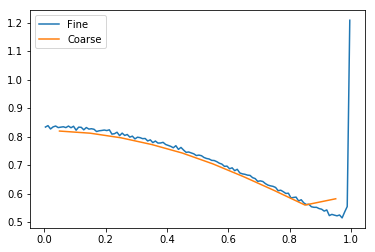

In [251]:
plt.plot(mu_bins_m,xi_fine[12,:],label='Fine')
plt.plot(mu_coarse,xi_coarse[2,:],label='Coarse');plt.legend();

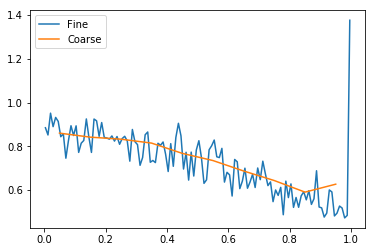

In [249]:
plt.plot(mu_bins_m,xi_fine[12,:],label='Fine')
plt.plot(mu_coarse,xi_coarse[2,:],label='Coarse');plt.legend();

Rebin Mock1 estimate into coarser bins of $\Delta\mu=0.1$,$\Delta{}r=5$:

In [85]:
len(r_bins_m)*len(mu_bins_m)

24240

In [248]:
for ii in range(1,100):
    r_bins_m,mu_bins_m,xi_fine = compute_xi_Mariana(ii)
    r_new=int(len(r_bins_m)//5);mu_new=int(len(mu_bins_m)//12)
    xi_coarse=np.zeros([r_new,mu_new])
    r_coarse=np.zeros(r_new);mu_coarse=np.zeros(mu_new)
    for j in range(len(mu_bins_m)//12*12):
        mu_coarse[j//12]+=mu_bins_m[j]/12.
    for i in range(len(r_bins_m)//5*5):
        r_coarse[i//5]+=0.2*r_bins_m[i]
        for j in range(len(mu_bins_m)//12*12):
            xi_coarse[i//5,j//12]+=xi_fine[i,j]/(5.*12.)
            
    outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
    with open(outdir+'QPM_Coarse_mock_%d.xi'%ii,"w") as outfile:
        for i in range(len(r_coarse)):
            outfile.write("%.8e "%r_coarse[i])
        outfile.write("\n")
        for j in range(len(mu_coarse)):
            outfile.write("%.8e "%mu_coarse[j])
        outfile.write("\n")
        for i in range(len(r_coarse)):
            for j in range(len(mu_coarse)):
                outfile.write("%.8e "%xi_coarse[i][j])
            outfile.write("\n")

In [156]:
## Repeat for mean:
xi_fine=np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",skip_header=2)
r_bins_m = np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",max_rows=1)
mu_bins_m = np.genfromtxt('../../xi_functions/QPM_Mean_xi.txt',skip_header=1,max_rows=1)
r_new=int(len(r_bins_m)//5);mu_new=int(len(mu_bins_m)//12)
xi_coarse=np.zeros([r_new,mu_new])
norm_coarse = np.zeros([r_new,mu_new])
r_coarse=np.zeros(r_new);mu_coarse=np.zeros(mu_new)
for j in range(len(mu_bins_m)//12*12):
    mu_coarse[j//12]+=mu_bins_m[j]/12.
for i in range(len(r_bins_m)//5*5):
    r_coarse[i//5]+=0.2*r_bins_m[i]
    for j in range(len(mu_bins_m)//12*12):
        xi_coarse[i//5,j//12]+=xi_fine[i,j]*r_bins_m[i]**2.#*np.sqrt(1.-mu_bins_m[j]**2.)
        norm_coarse[i//5,j//12]+=r_bins_m[i]**2.#np.sqrt(1.-mu_bins_m[j]**2.)
xi_coarse/=norm_coarse

In [145]:
outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
with open(outdir+'QPM_Coarse_mean.xi',"w") as outfile:
    for i in range(len(r_coarse)):
        outfile.write("%.8e "%r_coarse[i])
    outfile.write("\n")
    for j in range(len(mu_coarse)):
        outfile.write("%.8e "%mu_coarse[j])
    outfile.write("\n")
    for i in range(len(r_coarse)):
        for j in range(len(mu_coarse)):
            outfile.write("%.8e "%xi_coarse[i][j])
        outfile.write("\n")

In [153]:
r_bins_m[12]

12.5

In [154]:
r_coarse[2]

12.500000000000002

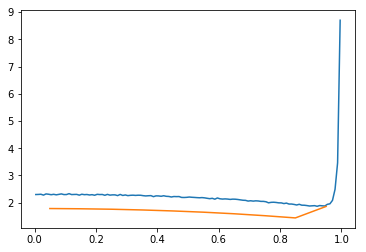

In [158]:
plt.plot(mu_bins_m,xi_fine[6,:])
plt.plot(mu_coarse,xi_coarse[1,:])

In [143]:
mu_bins_m[66],mu_coarse[5]

(0.554166667, 0.55)

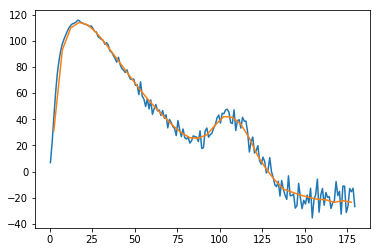

In [246]:
plt.plot(r_bins_m,xi_fine[:,66]*r_bins_m**2.)
plt.plot(r_coarse,xi_coarse[:,5]*r_coarse**2.)

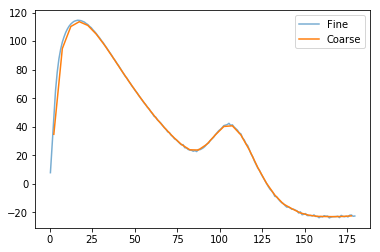

In [247]:
plt.plot(r_bins_m,xi_fine.mean(axis=1)*r_bins_m*r_bins_m,label='Fine',alpha=0.6)
plt.plot(r_coarse,xi_coarse.mean(axis=1)*r_coarse**2.,label='Coarse')
plt.legend();

Now save

In [62]:
outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
with open(outdir+'QPM_Coarse_mock_1.xi',"w") as outfile:
    for i in range(len(r_coarse)):
        outfile.write("%.8e "%r_coarse[i])
    outfile.write("\n")
    for j in range(len(mu_coarse)):
        outfile.write("%.8e "%mu_coarse[j])
    outfile.write("\n")
    for i in range(len(r_coarse)):
        for j in range(len(mu_coarse)):
            outfile.write("%.8e "%xi_coarse[i][j])
        outfile.write("\n")

In [14]:
tmp_xi = np.genfromtxt("/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/QPM_Mariana_mock_5.xi",skip_header=2)
tmp_xi2 = np.genfromtxt("/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/QPM_Mariana_mock_3.xi",skip_header=2)


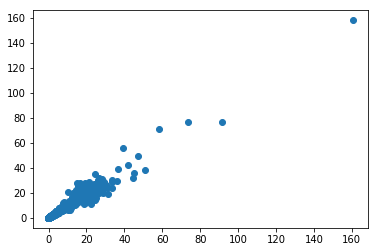

In [17]:
plt.scatter(tmp_xi.ravel(),tmp_xi2.ravel())

In [18]:
factors=[]
for i in range(1,100):
    mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(i).zfill(4)
    norms_M = np.loadtxt(mfile_norms,usecols=1)
    factor = norms_M[0]/norms_M[1]
    factors.append(factor)

In [147]:
mean(factors)*6.5e6

327134.2365956944

In [284]:
factors[0]*6.5e6

323221.48476408346

Comparison with self-computed DD:

In [407]:
DD_corrfunc = np.genfromtxt("/mnt/store1/oliverphilcox/CMU/QPM_DD1/DD_n36_m10.dat").reshape(36,10)

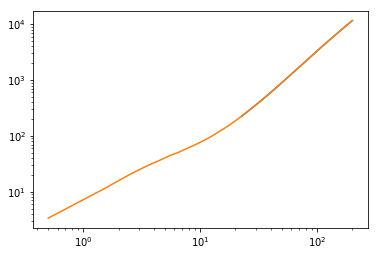

In [427]:
r_bins_all = np.loadtxt('../../python/binfile_linear.csv')
r_bins_corrfunc = np.mean(r_bins_all,axis=1)
plt.plot(r_bins_corrfunc,DD_corrfunc.mean(axis=1)/70.)
plt.plot(r_bins_m,DD_data_M.mean(axis=1));
plt.xscale('log');plt.yscale('log');

In [416]:
norms_M

array([ 100517.66300002, 2021415.16049598])

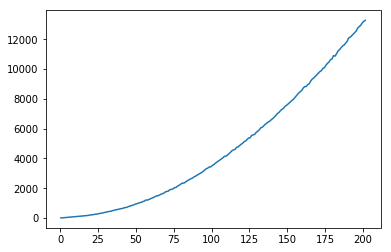

In [382]:
plt.plot(r_bins_m,DD_data_M[:,0])

In [378]:
mock_no=1
ratio_gal_rand = float(np.genfromtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,max_rows=1))
pairs_data = np.loadtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,skiprows=1)
r_all = pairs_data[:,0]
mu_all = pairs_data[:,1]
r_bins = np.unique(r_all)
mu_bins = np.unique(mu_all)
DD_data = pairs_data[:,2].reshape(len(r_bins),len(mu_bins))
DR_data = pairs_data[:,3].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand/2. # from different normalization
RR_data = pairs_data[:,4].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand**2.
xi_est = (DD_data-2.*DR_data+RR_data)/RR_data

In [379]:
mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4)
norms_M = np.loadtxt(mfile_norms,usecols=1)
factor = norms_M[0]/norms_M[1]

mfile_DD = root_dir_m+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4)
mfile_DR = root_dir_m+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4)
DD_data_M = np.loadtxt(mfile_DD,skiprows=2)
DR_data_M = np.loadtxt(mfile_DR,skiprows=2)*factor
RR_data_M = all_RR_data_M*factor**2.

xi_est_M = (DD_data_M-2.*DR_data_M+RR_data_M)/RR_data_M

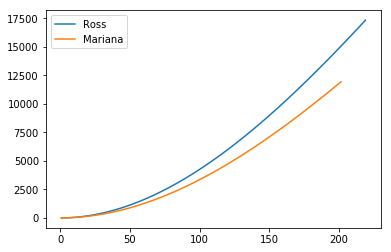

In [348]:
plt.plot(r_bins,DR_data.mean(axis=1),label='Ross')#*r_bins*r_bins)
plt.plot(r_bins_m,DR_data_M.mean(axis=1),label='Mariana')
plt.legend();

In [152]:
infile='/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_50X_Randoms/mock_random_DR12_CMASS_N_50x1.rdzw'
with open(infile,"r") as opener:
    for n,line in enumerate(opener):
        if n>10:
            break
        x=line

In [153]:
np.asarray(x.strip().split('  '),dtype=float)

array([230.3004  ,  32.875587,   0.433583,   0.299762])

Try out some new binning:

In [328]:
r_cross=50
r_min=0.1
r_max=200
delta_r=5
delta_log_r = 0.2
all_r=np.concatenate((np.exp(np.arange(np.log(r_min),np.log(r_cross),delta_log_r)),np.arange(r_cross,r_max+delta_r,delta_r)))

## Get middle to match up



In [329]:
for rr in range(len(all_r)-1):
    print("%.3f %.3f"%(all_r[rr],all_r[rr+1]))

0.100 0.122
0.122 0.149
0.149 0.182
0.182 0.223
0.223 0.272
0.272 0.332
0.332 0.406
0.406 0.495
0.495 0.605
0.605 0.739
0.739 0.903
0.903 1.102
1.102 1.346
1.346 1.644
1.644 2.009
2.009 2.453
2.453 2.996
2.996 3.660
3.660 4.470
4.470 5.460
5.460 6.669
6.669 8.145
8.145 9.948
9.948 12.151
12.151 14.841
14.841 18.127
18.127 22.141
22.141 27.043
27.043 33.030
33.030 40.343
40.343 49.275
49.275 50.000
50.000 55.000
55.000 60.000
60.000 65.000
65.000 70.000
70.000 75.000
75.000 80.000
80.000 85.000
85.000 90.000
90.000 95.000
95.000 100.000
100.000 105.000
105.000 110.000
110.000 115.000
115.000 120.000
120.000 125.000
125.000 130.000
130.000 135.000
135.000 140.000
140.000 145.000
145.000 150.000
150.000 155.000
155.000 160.000
160.000 165.000
165.000 170.000
170.000 175.000
175.000 180.000
180.000 185.000
185.000 190.000
190.000 195.000
195.000 200.000
